In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import and describe data
xls = pd.ExcelFile('Pitt_Data.xlsx')
dataset_1 = pd.read_excel(xls, sheet_name = 'all_data')
dataset_1.describe()
# dataset_1['subject_id'].value_counts()

,subject_id,number _visits,ss_onh,avgthickness,clockhour1,clockhour2,clockhour3,clockhour4,clockhour5,clockhour6,...,false_pos_rate,false_neg_rate,md,p_md,psd,p_psd,ght,vfi,al,cct
count,5481.000000,5481.000000,5481.000000,5480.000000,5480.0000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,...,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000,5477.000000,5477.000000,2468.000000,4434.000000
mean,1783.039591,6.744025,8.412516,76.997080,84.3750,76.609307,59.271898,61.787409,78.831387,99.742701,...,3.177157,1.203065,-3.764293,1.838898,3.826338,2.161832,2.064999,90.260362,24.485045,560.619764
std,986.360753,3.238677,0.906817,13.410924,20.6393,16.580733,11.440498,12.352634,20.239072,30.550594,...,3.925097,14.437260,6.137948,2.181406,3.511374,2.166915,1.028702,17.813470,1.661727,220.001560
min,4.000000,2.000000,7.000000,35.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-100.000000,-32.240000,0.000000,0.890000,0.000000,1.000000,0.000000,21.160000,0.586000
25%,969.000000,4.000000,8.000000,68.000000,70.0000,65.000000,52.000000,54.000000,64.000000,77.000000,...,0.000000,0.000000,-4.470000,0.000000,1.570000,0.000000,1.000000,91.000000,23.390000,529.000000
50%,1731.000000,6.000000,8.000000,77.000000,83.0000,75.000000,59.000000,61.000000,77.000000,99.000000,...,2.000000,0.000000,-1.630000,0.000000,2.060000,2.000000,2.000000,98.000000,24.140000,555.000000
75%,2633.000000,9.000000,9.000000,86.000000,97.0000,86.000000,66.000000,69.000000,91.000000,121.000000,...,5.000000,5.000000,-0.180000,5.000000,4.870000,5.000000,3.000000,99.000000,25.345000,582.750000
max,3521.000000,16.000000,10.000000,133.000000,256.0000,154.000000,125.000000,126.000000,187.000000,214.000000,...,33.000000,33.000000,5.780000,10.000000,16.530000,10.000000,6.000000,100.000000,31.520000,5872.000000


In [85]:
dataset_1['gca_average'].describe()


count    5481.000000
mean       70.262178
std         9.979159
min        24.000000
25%        64.000000
50%        71.000000
75%        77.000000
max       103.000000
Name: gca_average, dtype: float64

In [143]:
from IPython.display import display

#looking at our data types
# pd.set_option('display.max_rows', 500) #this allows us to see ALL the dtypes
pd.options.display.max_columns = None

dataset_1.dtypes

subject_id                   int64
name                        object
eye                         object
number _visits               int64
primary_dx                  object
secondary_dx                object
dob                 datetime64[ns]
gender                      object
race                        object
visit_date          datetime64[ns]
baseline_visit      datetime64[ns]
scan_time_onh       datetime64[ns]
scan_type_onh               object
ss_onh                       int64
avgthickness               float64
clockhour1                 float64
clockhour2                 float64
clockhour3                 float64
clockhour4                 float64
clockhour5                 float64
clockhour6                 float64
clockhour7                 float64
clockhour8                 float64
clockhour9                 float64
clockhour10                float64
clockhour11                float64
clockhour12                float64
quad_t                     float64
quad_s              

In [87]:
#to use for feature selection
dataset_1.columns.values

pd.DataFrame({'percent_missing': dataset_1.isnull().sum() * 100 / len(dataset_1)}).head()

,percent_missing
subject_id,0.000000
name,0.000000
eye,0.000000
number _visits,0.000000
primary_dx,0.145959


In [88]:
#select out some features we want to keep in a newly configured DF
select_features = ['subject_id','eye', 'number _visits', 'primary_dx', 'dob', 'gender', 'race', 'visit_date',
       'baseline_visit', 'avg_cd_ratio', 'gca_average', 'gca_tempsup', 'gca_sup',
       'gca_nassup', 'gca_nasinf', 'gca_inf', 'gca_tempinf',
       'rnfl_average', 'rnfl_tempsup', 'rnfl_sup', 'rnfl_nassup',
       'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf','md',
       'p_md', 'psd', 'p_psd', 'vfi']

In [146]:
#new dataframe with selected features only
dataset_2 = dataset_1[select_features]
dataset_2.describe().head()
len(select_features)

29

In [141]:
#missing data (Y/N)
#dataset_2.apply(lambda x: x.isnull().any())

#percent of missing data
pd.DataFrame({'percent_missing': dataset_2.isnull().sum() * 100 / len(dataset_2)})

#we are missing a few data points in the avg_cd_ratio and vfi columns

,percent_missing
subject_eyeD,0.0
subject_id,0.0
eye,0.0
number _visits,0.0
primary_dx,0.0
dob,0.0
gender,0.0
race,0.0
visit_date,0.0
baseline_visit,0.0


In [91]:
#dropped the data with NA for avg_cd_ratio and vfi

dataset_2.dropna(subset=['avg_cd_ratio'], inplace= True)
dataset_2.dropna(subset=['vfi'], inplace= True)
dataset_2.dropna(subset=['primary_dx'], inplace= True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [92]:
#get patient age from DOB and baseline visit and make new column 'age'

import datetime
dataset_2['age'] = (pd.to_datetime(dataset_2['visit_date']) - pd.to_datetime(dataset_2['dob'])).astype('timedelta64[Y]')

#get interval between visits per eye and make new column 'days_from_baseline'
dataset_2['days_from_baseline'] = (pd.to_datetime(dataset_2['visit_date']) - pd.to_datetime(dataset_2['baseline_visit'])).astype('timedelta64[D]')

#merge subject_id and eye into new column "subject_eyeD"

dataset_2['subject_eyeD'] = dataset_2['subject_id'].map(str) + dataset_2['eye']

#move new column subject_eyeD to the front of the dataframe

subject_eyeD = dataset_2['subject_eyeD']
dataset_2.drop(labels=['subject_eyeD'], axis=1,inplace = True)
dataset_2.insert(0, 'subject_eyeD', subject_eyeD)

#drop duplicates
duplicate_list = ['subject_eyeD', 'visit_date']
dataset_2.drop_duplicates(duplicate_list, inplace= True)

#convert VFI and PSD to linear scale from decibel (NOT VFI???)
dataset_2['md'] = (10**(dataset_2['md']/10))
# dataset_2['vfi'] = (10**(dataset_2['vfi']/10))
dataset_2['psd'] = (10**(dataset_2['psd']/10))


#make a new column 'visit_number' based on subject_eyeD
subject_id = 0
count = 1
dataset_2['visit_number'] = 0

for index, row in dataset_2.iterrows():
    s_id = row[0]
    if s_id == subject_id:
        count += 1
        dataset_2.at[index, 'visit_number'] = count
    else:
        count = 1
        subject_id = row[0]
        dataset_2.at[index, 'visit_number'] = count

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [93]:
dataset_2
dataset_2.to_csv('./RNN/dataset_2.csv')

In [94]:
dataset_2.head()

,subject_eyeD,subject_id,eye,number _visits,primary_dx,dob,gender,race,visit_date,baseline_visit,avg_cd_ratio,gca_average,gca_tempsup,gca_sup,gca_nassup,gca_nasinf,gca_inf,gca_tempinf,rnfl_average,rnfl_tempsup,rnfl_sup,rnfl_nassup,rnfl_nasinf,rnfl_inf,rnfl_tempinf,md,p_md,psd,p_psd,vfi,age,days_from_baseline,visit_number
0,4OD,4,OD,4,GL,1946-01-07,male,white,2010-03-15,2010-03-15,0.70,66,63,61,65,71,69,68,62.0,17,23,28,35,29,20,0.372392,5,2.041738,3,94.0,64.0,0.0,1
1,4OD,4,OD,4,GL,1946-01-07,male,white,2011-04-04,2010-03-15,0.69,66,64,61,65,71,68,68,57.0,16,23,28,35,29,20,0.457088,3,2.588213,5,94.0,65.0,385.0,2
2,4OD,4,OD,4,GL,1946-01-07,male,white,2012-04-16,2010-03-15,0.72,65,63,59,65,73,67,64,61.0,15,23,25,31,28,19,0.582103,2,1.905461,3,96.0,66.0,763.0,3
3,4OD,4,OD,4,GL,1946-01-07,male,white,2013-01-14,2010-03-15,0.73,65,63,60,65,70,67,67,59.0,17,24,28,34,29,20,0.407380,4,2.142891,4,95.0,67.0,1036.0,4
4,4OS,4,OS,6,GL,1946-01-07,male,white,2009-03-30,2009-03-30,0.76,54,48,53,59,57,52,57,48.0,16,21,25,25,23,18,0.141906,5,3.749730,5,83.0,63.0,0.0,1


In [131]:
average_days = []
for i in range(len(dataset_2['days_from_baseline'])):
    if list(dataset_2['days_from_baseline'])[i] != 0:
        difference = (list(dataset_2['days_from_baseline'])[i]) - (list(dataset_2['days_from_baseline'])[i-1])
        average_days.append(difference)
# average_days

In [138]:
# sum(average_days)/len(average_days)

import statistics
statistics.stdev(average_days)
# statistics.mean(average_days)

246.97380876922267

In [97]:
dataset_2.groupby(['subject_eyeD']).mean().describe()

,subject_id,number _visits,avg_cd_ratio,gca_average,gca_tempsup,gca_sup,gca_nassup,gca_nasinf,gca_inf,gca_tempinf,rnfl_average,rnfl_tempsup,rnfl_sup,rnfl_nassup,rnfl_nasinf,rnfl_inf,rnfl_tempinf,md,p_md,psd,p_psd,vfi,age,days_from_baseline,visit_number
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.00000
mean,1792.151515,5.168133,0.647526,70.343275,70.053911,70.809903,72.920818,70.821373,68.216211,69.396954,77.560736,20.668407,32.079979,35.037476,35.176396,31.374888,21.212083,0.656977,1.906755,3.866927,2.170927,89.713509,61.705602,666.674611,3.08260
std,996.126841,2.894945,0.160655,10.147814,10.252606,10.706245,11.102388,11.166933,10.912108,11.557267,13.464447,4.123820,7.215653,7.578648,8.560351,8.240012,5.047033,0.385635,1.937736,5.472919,1.888233,18.557043,13.636922,396.335877,1.44612
min,4.000000,2.000000,0.060000,27.000000,23.333333,25.000000,23.000000,21.600000,19.200000,23.000000,40.857143,8.166667,9.800000,10.000000,8.666667,4.600000,7.000000,0.000670,0.000000,1.273912,0.000000,2.000000,18.000000,38.500000,1.50000
25%,957.000000,3.000000,0.576667,64.450000,64.000000,64.162500,66.666667,64.309524,60.708333,60.937500,68.236111,19.000000,28.881944,31.333333,31.225000,27.900000,18.422222,0.377790,0.000000,1.452637,0.333333,91.000000,55.000000,325.150000,2.00000
50%,1750.000000,5.000000,0.673333,71.200000,71.166667,72.166667,73.800000,72.000000,69.200000,71.000000,77.666667,21.428571,33.000000,36.000000,36.333333,33.000000,22.500000,0.687722,1.250000,1.648589,1.750000,97.500000,61.857143,612.857143,3.00000
75%,2669.000000,7.000000,0.760000,77.500000,77.000000,78.166667,80.500000,78.500000,76.400000,78.000000,86.850000,23.250000,36.500000,39.950000,41.000000,37.000000,24.800000,0.939636,3.788889,2.994412,4.000000,99.000000,70.928571,976.944444,4.00000
max,3521.000000,16.000000,0.950000,98.750000,99.750000,100.000000,102.200000,100.500000,95.285714,102.000000,122.500000,32.444444,54.333333,57.500000,63.142857,52.500000,32.000000,2.427012,5.000000,43.573818,6.500000,100.000000,92.200000,1686.400000,8.50000


In [98]:
dataset_2['days_from_baseline'].head()

0       0.0
1     385.0
2     763.0
3    1036.0
4       0.0
Name: days_from_baseline, dtype: float64

In [128]:
dataset_2['age'].describe()

count    5284.000000
mean       62.376798
std        12.933140
min        18.000000
25%        55.000000
50%        62.000000
75%        71.000000
max        95.000000
Name: age, dtype: float64

In [158]:
len(single_patients[single_patients['gender'] == 'male'])

421

In [99]:
#looking at snapshot of all unique patients (each eye is a new patient)
single_patients = dataset_2.loc[dataset_2['days_from_baseline'] == 0.0]

#reset index
single_patients.reset_index(inplace = True)

#factorize primary_dx
factorized_pdx = pd.factorize(single_patients['primary_dx'])


single_patients

,index,subject_eyeD,subject_id,eye,number _visits,primary_dx,dob,gender,race,visit_date,baseline_visit,avg_cd_ratio,gca_average,gca_tempsup,gca_sup,gca_nassup,gca_nasinf,gca_inf,gca_tempinf,rnfl_average,rnfl_tempsup,rnfl_sup,rnfl_nassup,rnfl_nasinf,rnfl_inf,rnfl_tempinf,md,p_md,psd,p_psd,vfi,age,days_from_baseline,visit_number
0,0,4OD,4,OD,4,GL,1946-01-07,male,white,2010-03-15,2010-03-15,0.70,66,63,61,65,71,69,68,62.0,17,23,28,35,29,20,0.372392,5,2.041738,3,94.0,64.0,0.0,1
1,4,4OS,4,OS,6,GL,1946-01-07,male,white,2009-03-30,2009-03-30,0.76,54,48,53,59,57,52,57,48.0,16,21,25,25,23,18,0.141906,5,3.749730,5,83.0,63.0,0.0,1
2,10,14OD,14,OD,3,GL,1957-01-25,female,white,2013-11-21,2013-11-21,0.69,67,57,63,75,71,66,68,63.0,16,28,35,34,26,17,0.143219,5,11.561122,5,82.0,56.0,0.0,1
3,13,14OS,14,OS,5,GL,1957-01-25,female,white,2012-09-25,2012-09-25,0.59,70,65,71,76,70,67,68,75.0,22,32,34,36,31,21,0.696627,0,1.435489,0,99.0,55.0,0.0,1
4,18,18OD,18,OD,5,GS,1962-09-04,female,white,2009-06-08,2009-06-08,0.72,80,76,80,82,82,80,80,86.0,20,35,42,45,38,24,1.172195,0,1.458814,0,100.0,46.0,0.0,1
5,23,18OS,18,OS,4,GS,1962-09-04,female,white,2010-06-14,2010-06-14,0.76,80,79,81,85,83,76,79,77.0,20,31,33,38,34,22,1.148154,0,1.770109,3,98.0,47.0,0.0,1
6,27,23OD,23,OD,4,GL,1946-02-23,male,white,2013-10-03,2013-10-03,0.70,65,63,64,67,66,62,67,93.0,21,31,33,33,31,22,0.977237,0,1.273503,0,100.0,67.0,0.0,1
7,31,23OS,23,OS,3,GL,1946-02-23,male,white,2013-10-03,2013-10-03,0.77,56,48,53,66,62,54,53,68.0,17,28,32,35,26,13,0.255270,5,3.076097,5,89.0,67.0,0.0,1
8,34,25OD,25,OD,5,GS,1956-10-09,male,white,2009-05-21,2009-05-21,0.60,78,78,78,79,76,76,82,83.0,25,38,43,49,41,27,1.188502,0,1.361445,0,100.0,52.0,0.0,1
9,39,25OS,25,OS,5,GS,1956-10-09,male,white,2009-05-21,2009-05-21,0.62,78,79,78,78,78,75,79,80.0,22,37,42,46,41,27,1.221800,0,1.330454,0,100.0,52.0,0.0,1


In [100]:
categorical_features = ['eye', 'gender', 'race', 'number _visits', 'primary_dx']
continuous_features = ['avg_cd_ratio', 'gca_average', 'rnfl_average', 'vfi', 'md', 'age']

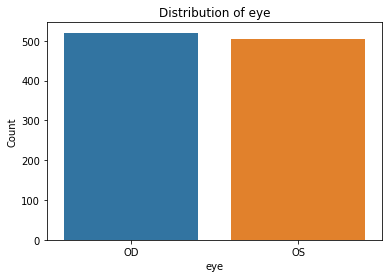

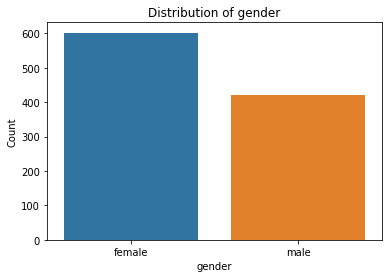

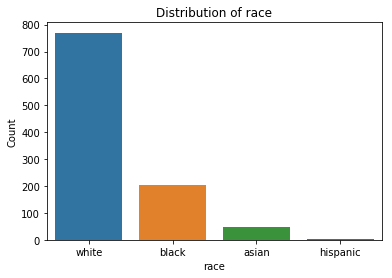

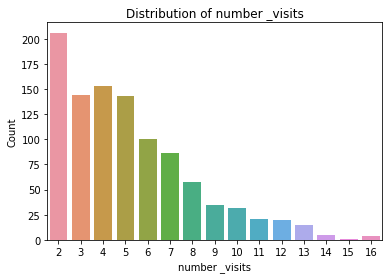

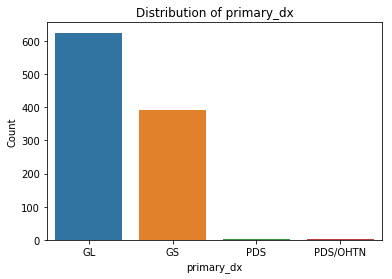

In [101]:
#here we are looking at the distribution of eye, gender, race and total number of visits for each patient_eye
#We see that R/L is pretty equal, F>>M, White > Black > Asian > Hispanic, and majority of visits are 2 to 8

for i in categorical_features:
    single_patients_count = single_patients[i].value_counts()
    plt.figure()
    sns.barplot(single_patients_count.index, single_patients_count.values)
    plt.title('Distribution of ' + i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.savefig(i, dpi=300)
    plt.show()

In [140]:
single_patients.groupby('eye').count()

,index,subject_eyeD,subject_id,number _visits,primary_dx,dob,gender,race,visit_date,baseline_visit,avg_cd_ratio,gca_average,gca_tempsup,gca_sup,gca_nassup,gca_nasinf,gca_inf,gca_tempinf,rnfl_average,rnfl_tempsup,rnfl_sup,rnfl_nassup,rnfl_nasinf,rnfl_inf,rnfl_tempinf,md,p_md,psd,p_psd,vfi,age,days_from_baseline,visit_number
eye,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
OD,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
OS,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503


In [20]:
time_steps_2_visits = np.array(single_patients['number _visits'].value_counts(sort = False))
total_time_steps_2_visits = []
for i in range(len(time_steps_2_visits)):
    total_time_steps_2_visits.append(time_steps_2_visits[i]*(i+1))

In [21]:
#single_patients['number _visits'].describe()

for i in range(len(total_time_steps_2_visits)):
    print(str(time_steps_2_visits[i]) + '*' + str(i+1) + ' = ' + str(total_time_steps_2_visits[i]) + ' intervals from ' + str(i+2) + ' visits')

print('for a total of: ' + str(np.sum(total_time_steps_2_visits)) + ' intervals')

206*1 = 206 intervals from 2 visits
144*2 = 288 intervals from 3 visits
153*3 = 459 intervals from 4 visits
143*4 = 572 intervals from 5 visits
100*5 = 500 intervals from 6 visits
86*6 = 516 intervals from 7 visits
58*7 = 406 intervals from 8 visits
35*8 = 280 intervals from 9 visits
32*9 = 288 intervals from 10 visits
21*10 = 210 intervals from 11 visits
20*11 = 220 intervals from 12 visits
15*12 = 180 intervals from 13 visits
5*13 = 65 intervals from 14 visits
1*14 = 14 intervals from 15 visits
4*15 = 60 intervals from 16 visits
for a total of: 4264 intervals


Possible models

1.	Taking 2 time points (with one visit, can I predict the next)
            - 206*1 = 206 intervals from 2 visits
            - 144*2 = 288 intervals from 3 visits
            - 153*3 = 459 intervals from 4 visits
            - 143*4 = 572 intervals from 5 visits
            - 100*5 = 500 intervals from 6 visits
            - 86*6 = 516 intervals from 7 visits
            - 58*7 = 406 intervals from 8 visits
            - 35*8 = 280 intervals from 9 visits
            - 32*9 = 288 intervals from 10 visits
            - 21*10 = 210 intervals from 11 visits
            - 20*11 = 220 intervals from 12 visits
            - 15*12 = 180 intervals from 13 visits
            - 5*13 = 65 intervals from 14 visits
            - 1*14 = 14 intervals from 15 visits
            - 4*15 = 60 intervals from 16 visits
        - for a total of: 4264 intervals


2.	Taking 3 time points (with two visits, can I predict the next) 
            - 144*1 = 144 intervals from 3 visits
            - 153*2 = 306 intervals from 4 visits
            - 143*3 = 429 intervals from 5 visits
            - 100*4 = 400 intervals from 6 visits
            - 86*5 = 430 intervals from 7 visits
            - 58*6 = 348 intervals from 8 visits
            - 35*7 = 245 intervals from 9 visits
            - 32*8 = 256 intervals from 10 visits
            - 21*9 = 189 intervals from 11 visits
            - 20*10 = 200 intervals from 12 visits
            - 15*11 = 165 intervals from 13 visits
            - 5*12 = 60 intervals from 14 visits
            - 1*13 = 13 intervals from 15 visits
            - 4*14 = 56 intervals from 16 visits
        - for a total of: 3241 intervals


3.	Taking 4 time points (with three visits, can I predict the next)
            - 153*1 = 153 intervals from 4 visits
            - 143*2 = 286 intervals from 5 visits
            - 100*3 = 300 intervals from 6 visits
            - 86*4 = 344 intervals from 7 visits
            - 58*5 = 290 intervals from 8 visits
            - 35*6 = 210 intervals from 9 visits
            - 32*7 = 224 intervals from 10 visits
            - 21*8 = 168 intervals from 11 visits
            - 20*9 = 180 intervals from 12 visits
            - 15*10 = 150 intervals from 13 visits
            - 5*11 = 55 intervals from 14 visits
            - 1*12 = 12 intervals from 15 visits
            - 4*13 = 52 intervals from 16 visits
        - for a total of: 2424 intervals


In [22]:
# total_time_steps_3_visits = []
# total_time_steps_4_visits = []
# total_time_steps_5_visits = []
# total_time_steps_6_visits = []

# for i in range(len(time_steps_3_visits)):
#     total_time_steps_3_visits.append(time_steps_3_visits[i]*(i+1))
    
# for i in range(len(time_steps_4_visits)):
#     total_time_steps_4_visits.append(time_steps_4_visits[i]*(i+1))

# for i in range(len(time_steps_5_visits)):
#     total_time_steps_5_visits.append(time_steps_5_visits[i]*(i+1))
    
# for i in range(len(time_steps_6_visits)):
#     total_time_steps_6_visits.append(time_steps_6_visits[i]*(i+1))
    
# #single_patients['number _visits'].describe()

# for i in range(len(total_time_steps_3_visits)):
#     print(str(time_steps_3_visits[i]) + '*' + str(i+1) + ' = ' + str(total_time_steps_3_visits[i]) + ' intervals from ' + str(i+2) + ' visits')
# print('for a total of: ' + str(np.sum(total_time_steps_3_visits)) + ' intervals')
# print('-' * 100)

# for i in range(len(total_time_steps_4_visits)):
#     print(str(time_steps_4_visits[i]) + '*' + str(i+1) + ' = ' + str(total_time_steps_4_visits[i]) + ' intervals from ' + str(i+2) + ' visits')
# print('for a total of: ' + str(np.sum(total_time_steps_4_visits)) + ' intervals')
# print('-' * 100)

# for i in range(len(total_time_steps_5_visits)):
#     print(str(time_steps_5_visits[i]) + '*' + str(i+1) + ' = ' + str(total_time_steps_5_visits[i]) + ' intervals from ' + str(i+2) + ' visits')
# print('for a total of: ' + str(np.sum(total_time_steps_5_visits)) + ' intervals')    
# print('-' * 100)

# for i in range(len(total_time_steps_6_visits)):
#     print(str(time_steps_6_visits[i]) + '*' + str(i+1) + ' = ' + str(total_time_steps_6_visits[i]) + ' intervals from ' + str(i+2) + ' visits')
# print('for a total of: ' + str(np.sum(total_time_steps_6_visits)) + ' intervals')
# print('-' * 100)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


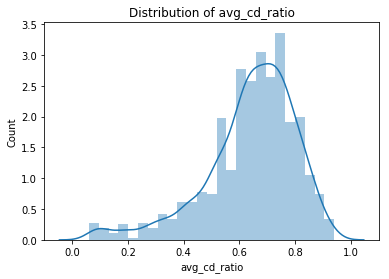

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


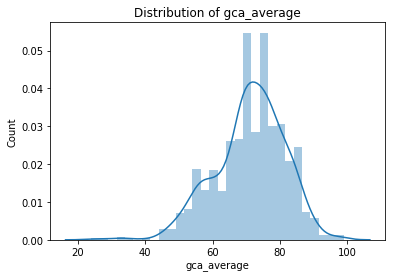

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


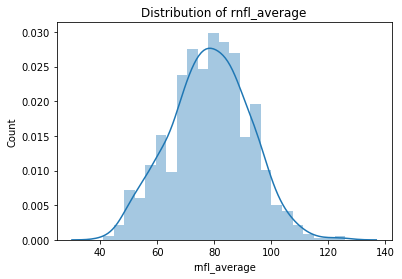

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


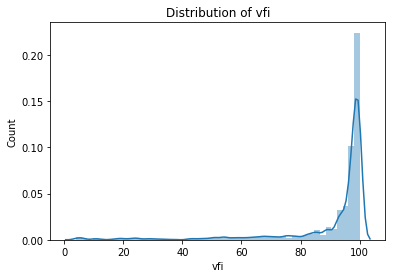

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


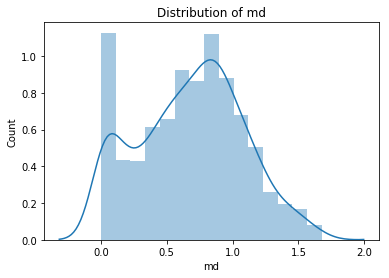

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


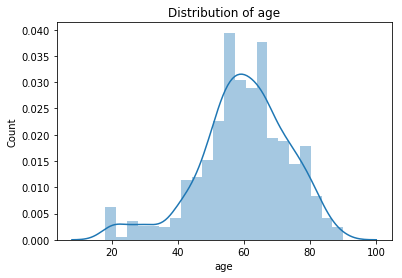

In [159]:
#here we are looking at the distribution of CD_ratio, GCA, RNFL, VFI, age for each patient_eye
#We see that R/L is pretty equal, F>>M, White > Black > Asian > Hispanic, and majority of visits are 2 to 8

for i in continuous_features:
    plt.figure()
    sns.distplot(single_patients[i])
    plt.title('Distribution of ' + i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.savefig(i, dpi=300)
    plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


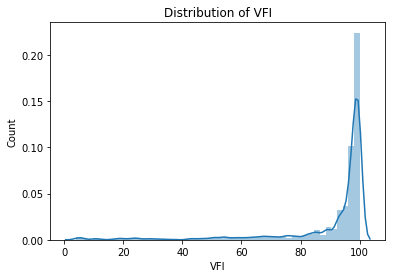

In [160]:
plt.figure()
sns.distplot(single_patients['vfi'])
plt.title('Distribution of VFI')
plt.xlabel('VFI')
plt.ylabel('Count')
plt.savefig('VFI', dpi=300)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


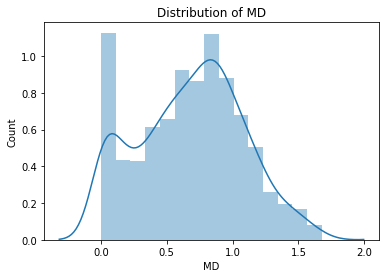

In [161]:
plt.figure()
sns.distplot(single_patients['md'])
plt.title('Distribution of MD')
plt.xlabel('MD')
plt.ylabel('Count')
plt.savefig('MD', dpi=300)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


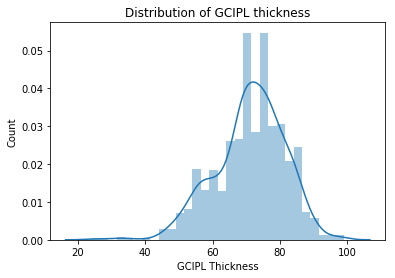

In [164]:
plt.figure()
sns.distplot(single_patients['gca_average'])
plt.title('Distribution of GCIPL thickness')
plt.xlabel('GCIPL Thickness')
plt.ylabel('Count')
plt.savefig('GCIPL', dpi=300)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


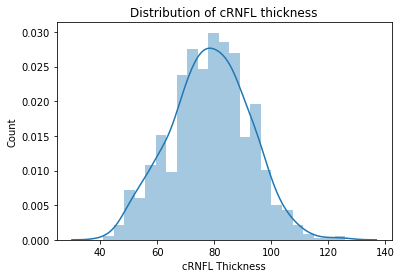

In [163]:
plt.figure()
sns.distplot(single_patients['rnfl_average'])
plt.title('Distribution of cRNFL thickness')
plt.xlabel('cRNFL Thickness')
plt.ylabel('Count')
plt.savefig('cRNFL', dpi=300)
plt.show()

# ML

In [24]:
single_patients.columns

Index(['index', 'subject_eyeD', 'subject_id', 'eye', 'number _visits',
       'primary_dx', 'dob', 'gender', 'race', 'visit_date', 'baseline_visit',
       'avg_cd_ratio', 'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup',
       'gca_nasinf', 'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup',
       'rnfl_sup', 'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf',
       'md', 'p_md', 'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline',
       'visit_number'],
      dtype='object')

In [25]:
#PCA using structural/functional as Y and ONLY CONTINUOUS VARIABLES for X
PCA_features = ['avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age']

single_patients_PCA = single_patients[PCA_features]

First three variances of the linear kernel are: [0.5571305162784144, 0.10068076163181998, 0.06600260226668887]


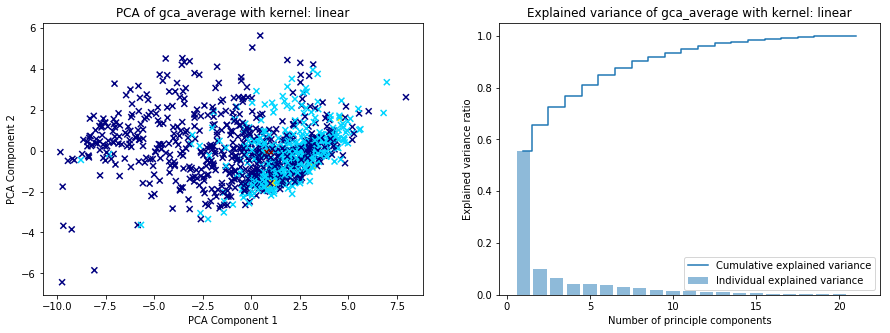

--------------------------------------------------------------------------------------------------------------
First three variances of the linear kernel are: [0.5693438620239298, 0.1062567712930843, 0.06608190023680283]


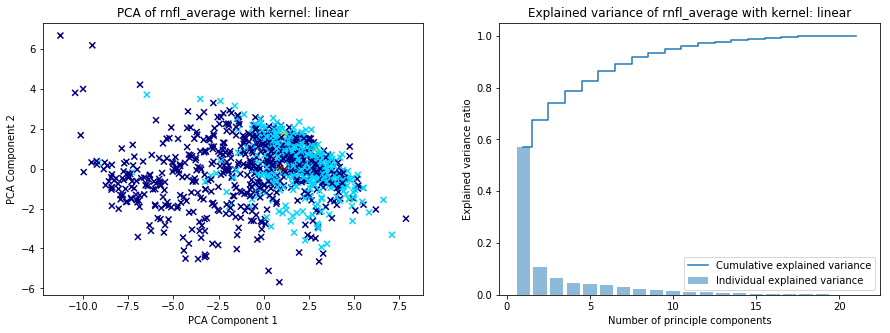

--------------------------------------------------------------------------------------------------------------
First three variances of the linear kernel are: [0.5732600892647448, 0.09959349509383168, 0.06747853846916502]


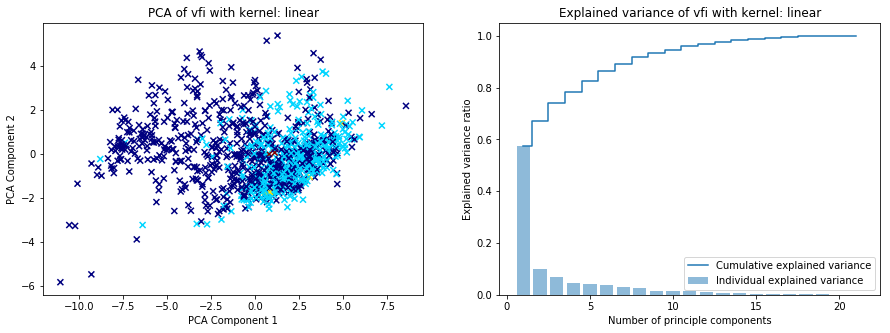

--------------------------------------------------------------------------------------------------------------
First three variances of the linear kernel are: [0.5765947607682493, 0.09414681306575204, 0.06377956718156574]


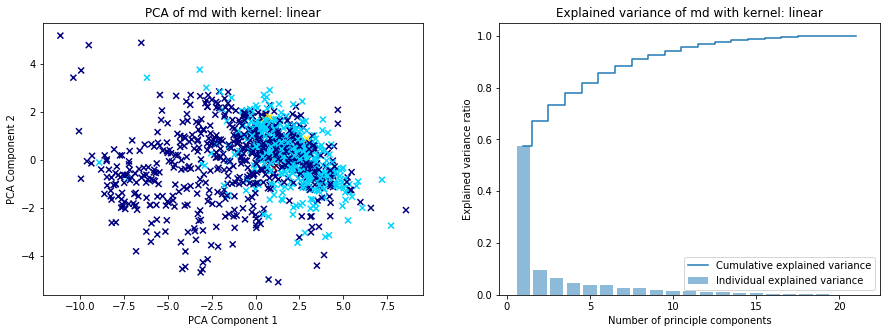

--------------------------------------------------------------------------------------------------------------
First three variances of the poly kernel are: [0.42848654545836395, 0.11569757701436385, 0.09504035858401219]


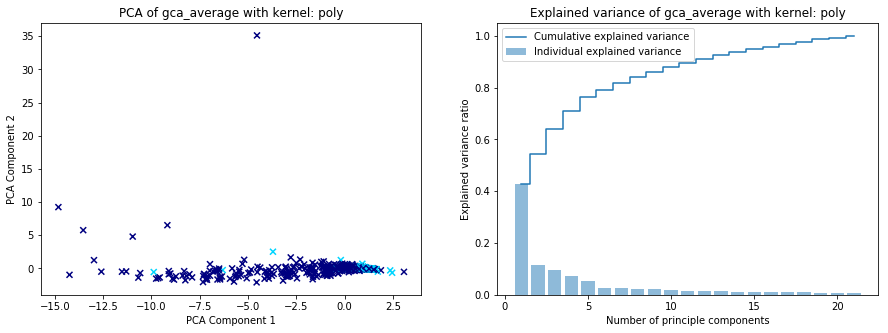

--------------------------------------------------------------------------------------------------------------
First three variances of the poly kernel are: [0.4369784340799138, 0.12425473594939182, 0.10215423890981337]


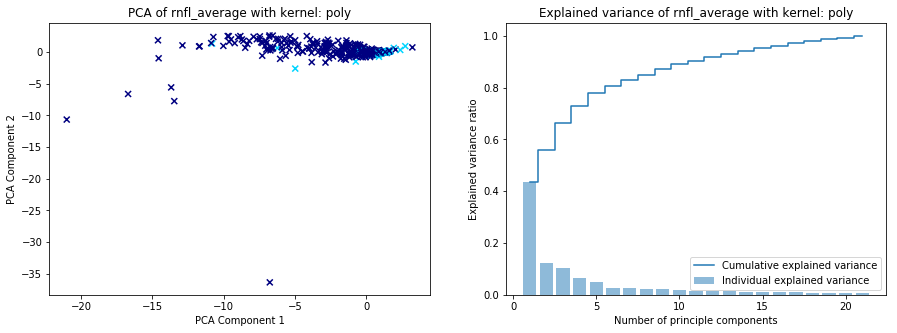

--------------------------------------------------------------------------------------------------------------
First three variances of the poly kernel are: [0.4237537831970602, 0.12986496818565893, 0.10112312422578784]


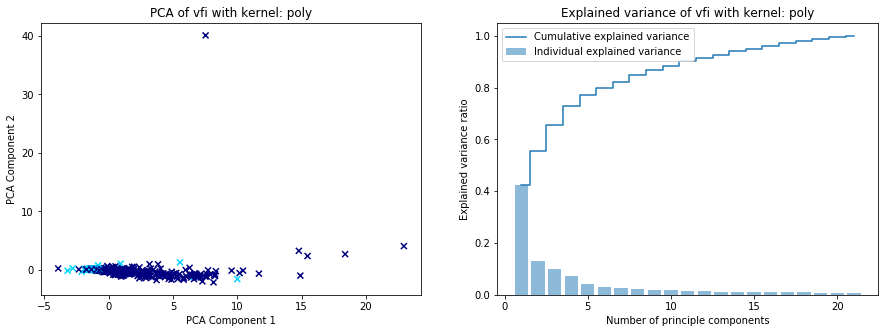

--------------------------------------------------------------------------------------------------------------
First three variances of the poly kernel are: [0.43253125860581787, 0.12277716370071884, 0.09946630203839457]


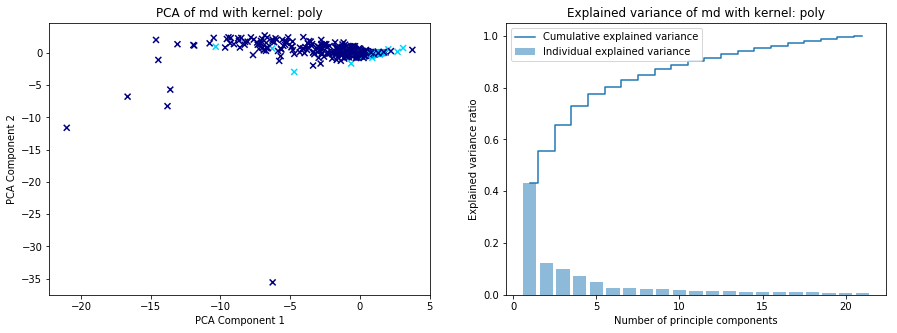

--------------------------------------------------------------------------------------------------------------
First three variances of the rbf kernel are: [0.2591009226315996, 0.16531260986010987, 0.08411115833009314]


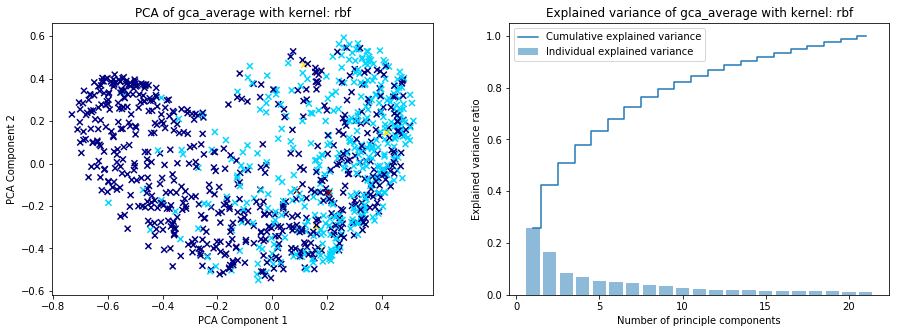

--------------------------------------------------------------------------------------------------------------
First three variances of the rbf kernel are: [0.2593992467943407, 0.16715114437113693, 0.08575319604489537]


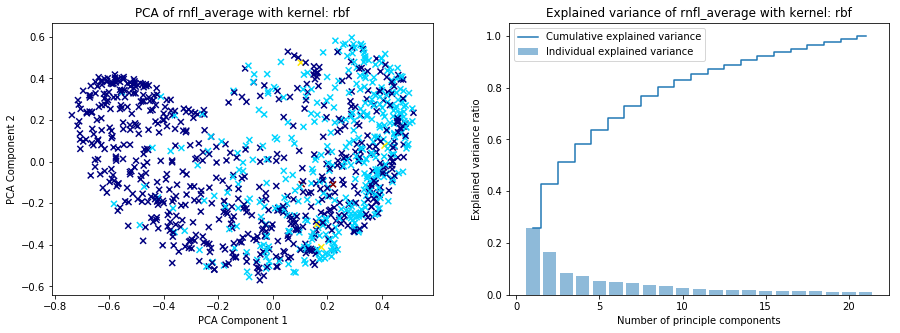

--------------------------------------------------------------------------------------------------------------
First three variances of the rbf kernel are: [0.26472215771088903, 0.16751398563884706, 0.08389619398739208]


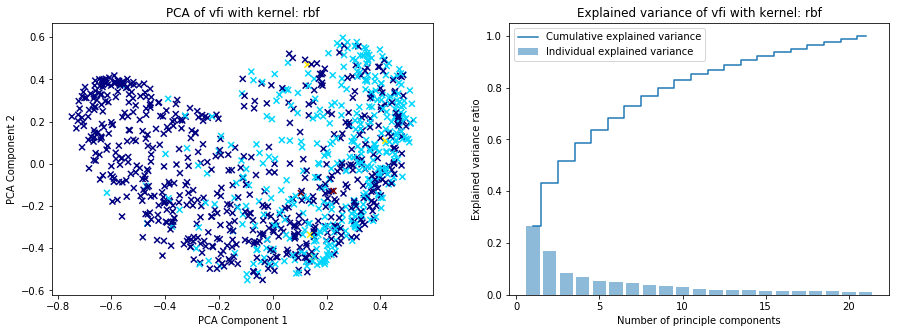

--------------------------------------------------------------------------------------------------------------
First three variances of the rbf kernel are: [0.26099025692638805, 0.17816985772650187, 0.07380214905794763]


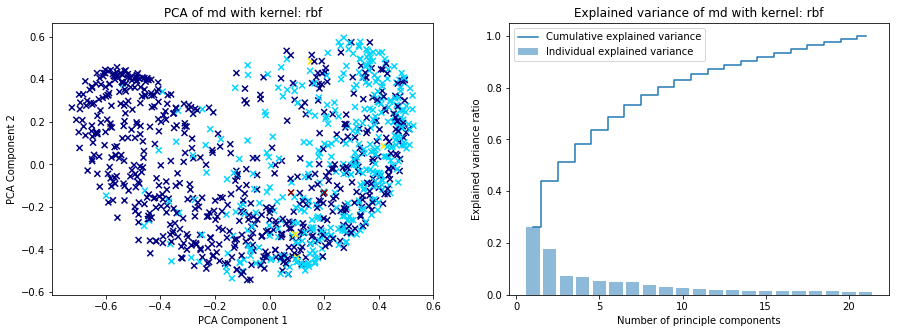

--------------------------------------------------------------------------------------------------------------
First three variances of the sigmoid kernel are: [0.5673781231319635, 0.09492505157093847, 0.06879479895380623]


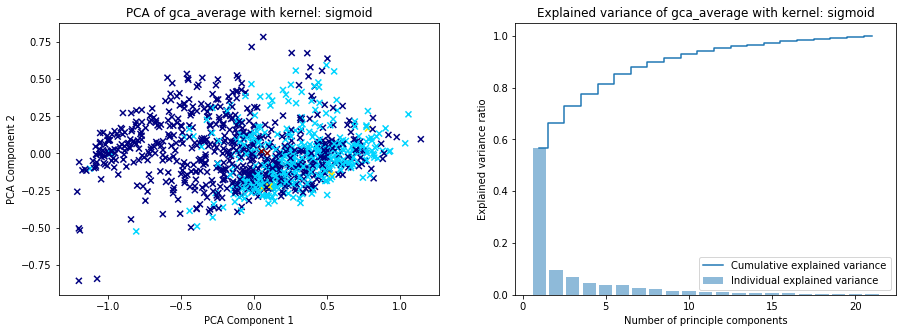

--------------------------------------------------------------------------------------------------------------
First three variances of the sigmoid kernel are: [0.5732432389558723, 0.09927069566995289, 0.06887385278671407]


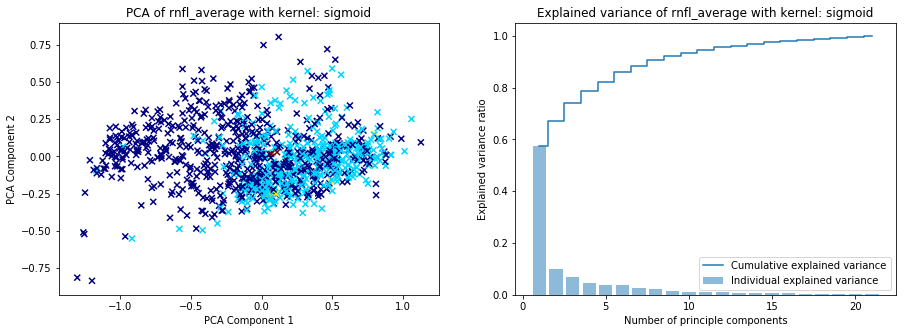

--------------------------------------------------------------------------------------------------------------
First three variances of the sigmoid kernel are: [0.5729091318047236, 0.09169638704665566, 0.06829749173828]


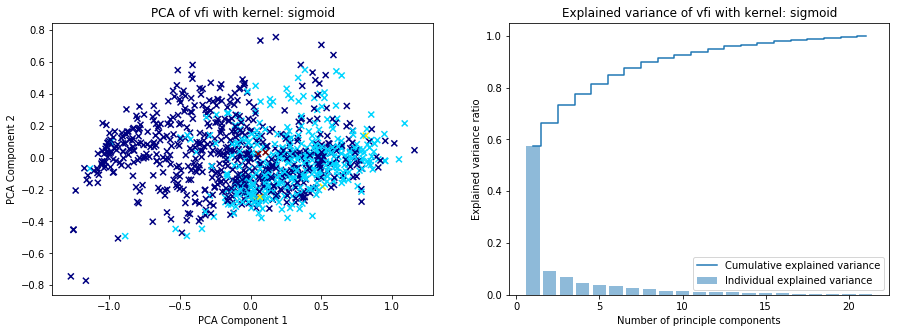

--------------------------------------------------------------------------------------------------------------
First three variances of the sigmoid kernel are: [0.5821659284890665, 0.08446890294911107, 0.06437257502350202]


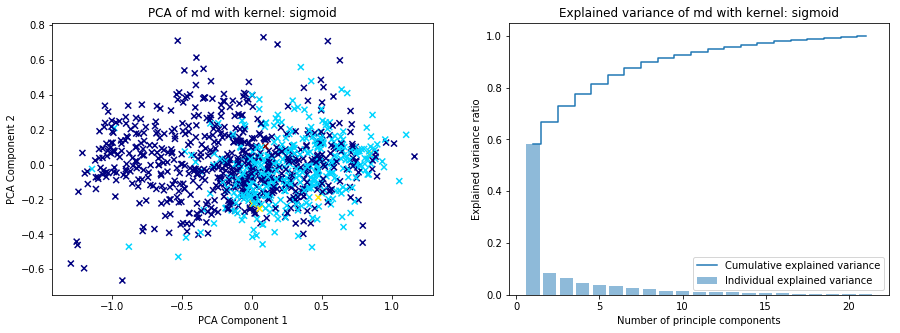

--------------------------------------------------------------------------------------------------------------
First three variances of the cosine kernel are: [0.4156826586509535, 0.14229248435177955, 0.09213609253867315]


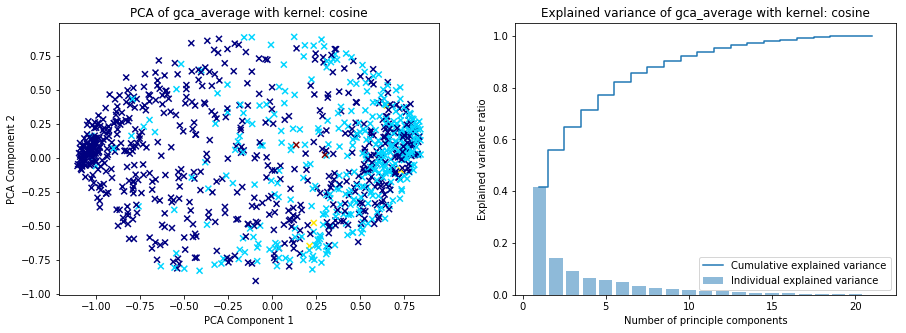

--------------------------------------------------------------------------------------------------------------
First three variances of the cosine kernel are: [0.4227939788831596, 0.15013480037522572, 0.09524208521430366]


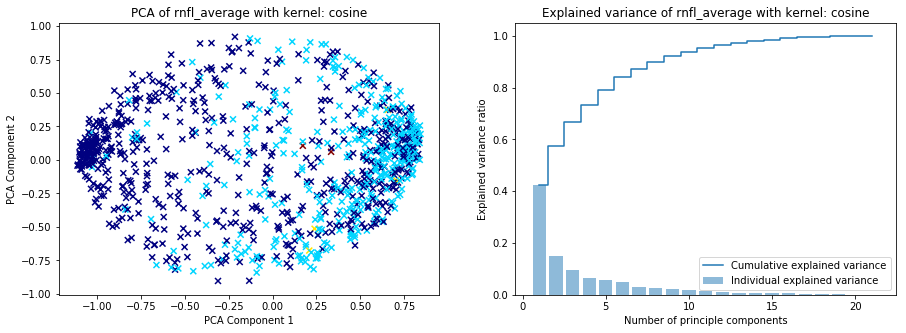

--------------------------------------------------------------------------------------------------------------
First three variances of the cosine kernel are: [0.4276815399653611, 0.14204526046949265, 0.0929473666897991]


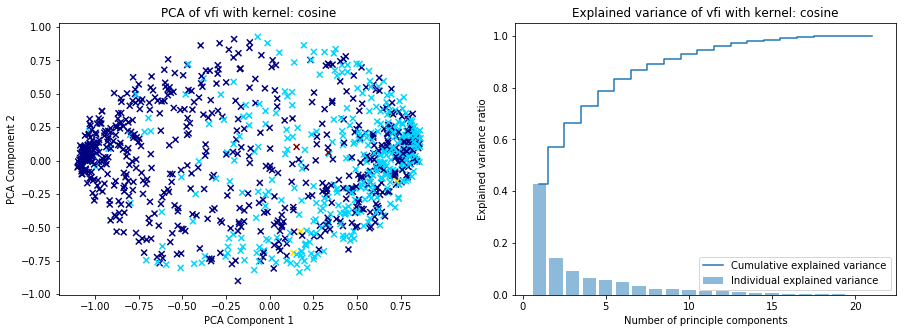

--------------------------------------------------------------------------------------------------------------
First three variances of the cosine kernel are: [0.4269468772958952, 0.13158072092988238, 0.09401407638112824]


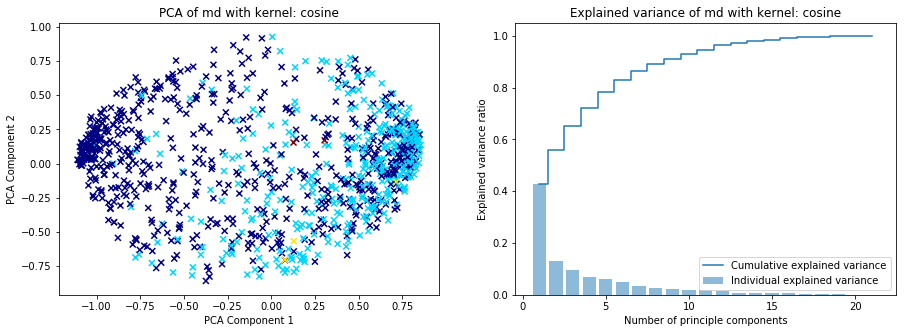

--------------------------------------------------------------------------------------------------------------


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#here, we are looking at selected functional/structural features and performing PCA on them with 5 different kernels
Y_features = ['gca_average', 'rnfl_average', 'vfi', 'md']

#kernels
from sklearn.decomposition import KernelPCA
kernels = list(['linear', 'poly', 'rbf', 'sigmoid', 'cosine'])
variance_list = []


#here, we are looking at selected functional/structural features and performing PCA on them with 5 different kernels
for i in kernels:
    for j in Y_features:
        X_features = single_patients_PCA.loc[:, single_patients_PCA.columns != j]
        X_features = sc.fit_transform(X_features)
        transformer = KernelPCA(n_components=21, kernel=i)
        X_transformed = transformer.fit_transform(X_features)
        #Applying the PCA
        fig = plt.figure(figsize=(15,5))
        pca1 = X_transformed[:, 0]
        pca2 = X_transformed[:, 1]

        #plotting class distributions per kernel (PCA1 vs 2)
        fig.add_subplot(1,2,1)
        plt.scatter(pca1, pca2, c=factorized_pdx[0], marker='x', cmap='jet')
        plt.title('PCA of ' + j + ' with kernel: ' + i)
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        #plt.legend(loc='best')

        #variance explained per kernel
        eigen_values = np.array(transformer.lambdas_)
        #eigen_vectors = np.array(transformer.alphas_)
        total_values = np.sum(eigen_values)
        variance_explained = [(i / total_values) for i in (eigen_values)]
        cumulative_variance_explained = np.cumsum(variance_explained)
        variance_list.append(cumulative_variance_explained)
        print('First three variances of the ' + i + ' kernel are: ' + str(variance_explained[0:3]))

        fig.add_subplot(1,2,2)
        plt.bar(range(1, 22), variance_explained, alpha=0.5, align='center', label = 'Individual explained variance')
        plt.step(range(1, 22), cumulative_variance_explained, where='mid', label = 'Cumulative explained variance')
        plt.title('Explained variance of ' + j + ' with kernel: ' + i)
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Number of principle components')
        plt.legend(loc='best')
        
        import os
        plt.savefig('PCA_figures/{}_{}'.format(i,j))                  
        plt.show()
        
        print('-' * 110)

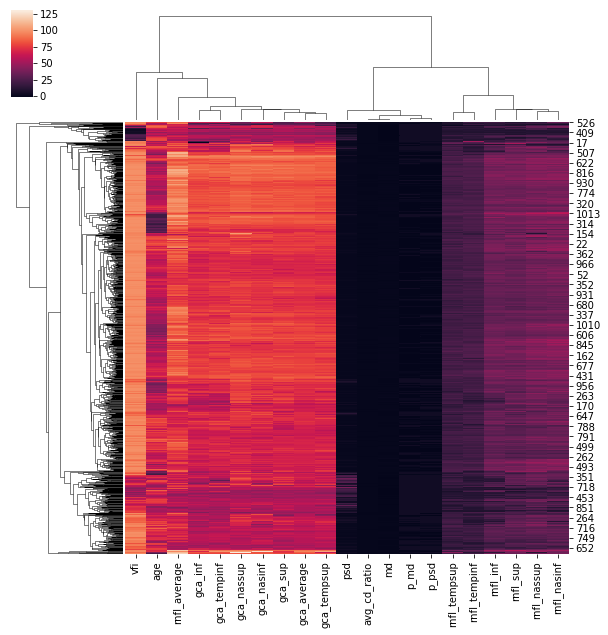

In [27]:
sns.clustermap(single_patients_PCA)

In [28]:
#Questions for Fenyo

#How do I incorporate temporality
#Glaucoma suspect vs glaucoma
#RNN

# POST FENYO MEETING

# For 2 Visits

In [29]:
two_visit_dataset = dataset_2[dataset_2['number _visits'] >= 2]

In [30]:
print(len(dataset_2))
print(len(two_visit_dataset))

5284
5284


In [31]:
empty_list= []
for i in range(len(two_visit_dataset)-1):
    if (two_visit_dataset.iloc[i,0] == two_visit_dataset.iloc[i+1,0]):
        empty_list.append(two_visit_dataset.iloc[i,:].values.tolist())
        empty_list.append(two_visit_dataset.iloc[i+1,:].values.tolist())        

In [32]:
len(empty_list)

8522

In [33]:
two_visit_dataset_curated = pd.DataFrame(np.array(empty_list).reshape(8522,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

In [34]:
visit_twos = []
subject_list = []
visit_ones = []
for i in range(0, len(two_visit_dataset_curated)-1, 2):
    visit_2 = two_visit_dataset_curated.iloc[i+1,:].values
    visit_twos.append(visit_2)
    subject = two_visit_dataset_curated.iloc[i,0]
    subject_list.append(subject)
    visit_1 = two_visit_dataset_curated.iloc[i,:].values
    visit_ones.append(visit_1)

In [35]:
len(visit_ones)

4261

In [36]:
visit_ones = pd.DataFrame(np.array(visit_ones).reshape(4261,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

visit_twos = pd.DataFrame(np.array(visit_twos).reshape(4261,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

visit_twos_MD = visit_twos.filter(['md'], axis=1)
visit_twos_VFI = visit_twos.filter(['vfi'], axis=1)
visit_twos_RNFL = visit_twos.filter(['rnfl_average'], axis=1)
visit_twos_GCA = visit_twos.filter(['gca_average'], axis=1)

visit_ones = visit_ones.drop(['subject_eyeD', 'subject_id', 'eye', 'number _visits',
       'dob', 'visit_date', 'baseline_visit', 'days_from_baseline', 'visit_number'], axis = 1)

## Importing the two-visit curated datasets to ANN, RNN, and Linear folder

In [37]:
visit_ones.to_csv('./ANN/Interval of 2 visits/X_visit_ones.csv')

visit_twos_MD.to_csv('./ANN/Interval of 2 visits/Y_visit_twos_MD.csv')
visit_twos_VFI.to_csv('./ANN/Interval of 2 visits/Y_visit_twos_VFI.csv')
visit_twos_RNFL.to_csv('./ANN/Interval of 2 visits/Y_visit_twos_RNFL.csv')
visit_twos_GCA.to_csv('./ANN/Interval of 2 visits/Y_visit_twos_GCA.csv')

In [38]:
two_visit_dataset_curated.to_csv('./Simple Linear Analysis/dataset_interval_two.csv')
two_visit_dataset_curated.to_csv('./RNN/dataset_interval_two.csv')

# For 3 visits

In [39]:
#subsetting all visits >= 3
three_visit_dataset = dataset_2[dataset_2['number _visits'] >= 3]

In [40]:
print(len(dataset_2))
print(len(three_visit_dataset))

5284
4872


In [41]:
#now we are going to iterate through all of our visits, making a new list
empty_list= []
for i in range(len(three_visit_dataset)-2):
    if (three_visit_dataset.iloc[i,0] == three_visit_dataset.iloc[i+1,0]) & (three_visit_dataset.iloc[i,0] == three_visit_dataset.iloc[i+2,0]):
        empty_list.append(three_visit_dataset.iloc[i,:].values.tolist())
        empty_list.append(three_visit_dataset.iloc[i+1,:].values.tolist())
        empty_list.append(three_visit_dataset.iloc[i+2,:].values.tolist())

In [42]:
len(empty_list)

9714

In [43]:
three_visit_dataset_curated = pd.DataFrame(np.array(empty_list).reshape(9714,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

In [44]:
visit_delta = []
visit_threes = []
subject_list = []
visit_ones = []
for i in range(0, len(three_visit_dataset_curated)-2, 3):
    delta = three_visit_dataset_curated.iloc[i+1,10:30].values - three_visit_dataset_curated.iloc[i,10:30].values
    delta = delta/(three_visit_dataset_curated['days_from_baseline'][i+1]-three_visit_dataset_curated['days_from_baseline'][i])
    visit_delta.append(delta)
    visit_3 = three_visit_dataset_curated.iloc[i+2,:].values
    visit_threes.append(visit_3)
    subject = three_visit_dataset_curated.iloc[i,0]
    subject_list.append(subject)
    visit_1 = three_visit_dataset_curated.iloc[i,:].values
    visit_ones.append(visit_1)

In [80]:
visit_delta.head()

,avg_cd_ratio,gca_average,gca_tempsup,gca_sup,gca_nassup,gca_nasinf,gca_inf,gca_tempinf,rnfl_average,rnfl_tempsup,rnfl_sup,rnfl_nassup,rnfl_nasinf,rnfl_inf,rnfl_tempinf,md,p_md,psd,p_psd,vfi
0,-2.5974e-05,0,0.0025974,0,0,0,-0.0025974,0,-0.012987,-0.0025974,0,0,0,0,0,0.000219991,-0.00519481,0.00141942,0.00519481,0
1,7.93651e-05,-0.0026455,-0.0026455,-0.00529101,0,0.00529101,-0.0026455,-0.010582,0.010582,-0.0026455,0,-0.00793651,-0.010582,-0.0026455,-0.0026455,0.000330728,-0.0026455,-0.00180622,-0.00529101,0.00529101
2,-5.71429e-05,0.00285714,0.0142857,0,-0.00285714,-0.00571429,-0.00285714,0.00285714,0.0114286,-0.00857143,0,0,0,0,-0.00857143,-0.000345888,0,0.0038388,0,-0.0828571
3,5.19481e-05,0.00519481,0.00779221,0.00779221,0.0025974,0.00519481,0.00519481,0.00779221,-0.00779221,0,0.00519481,0.0103896,0.00519481,0,-0.0025974,0.000280468,0,-0.00589202,0,0.0805195
4,0,0,0,-0.0026455,0.0026455,-0.0026455,0,0,-0.00529101,0,-0.0026455,-0.00529101,-0.0026455,0,0.0026455,0.000191925,0,-6.8515e-05,0,-0.00529101


In [46]:
len(visit_delta)

3238

In [47]:
visit_delta = pd.DataFrame(np.array(visit_delta).reshape(3238,20), columns = list(['avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi']))

visit_ones = pd.DataFrame(np.array(visit_ones).reshape(3238,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

In [48]:
#add subject ID from subject_list to new dataframe
#visit_delta.insert(0, 'subject_eyeD', subject_list)

In [49]:
#delta_visit_ones = visit 1 + the delta of visit 3 and visit 2 normalized to time (for intervals of 3)

delta_visit_ones = visit_ones.join(visit_delta, rsuffix = '_delta')

In [50]:
delta_visit_ones = delta_visit_ones.drop(['subject_eyeD', 'subject_id', 'eye', 'number _visits',
       'dob', 'visit_date', 'baseline_visit', 'days_from_baseline', 'visit_number'], axis = 1)

In [51]:
# delta_visit_ones_MD = delta_visit_ones.drop(['md'], axis = 1)
# delta_visit_ones_VFI = delta_visit_ones.drop(['vfi'], axis = 1)
# delta_visit_ones_RNFL = delta_visit_ones.drop(['rnfl_average'], axis = 1)
# delta_visit_ones_GCA = delta_visit_ones.drop(['gca_average'], axis = 1)

In [52]:
#visit_threes = the third visit of the three-interval patients, this corresponds to the Y value for the X's we created

visit_threes = pd.DataFrame(np.array(visit_threes).reshape(3238,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

visit_threes_MD = visit_threes.filter(['md'], axis=1)
visit_threes_VFI = visit_threes.filter(['vfi'], axis=1)
visit_threes_RNFL = visit_threes.filter(['rnfl_average'], axis=1)
visit_threes_GCA = visit_threes.filter(['gca_average'], axis=1)

## Importing the three-visit curated datasets to ANN, RNN, and Linear folder

In [53]:
#these are the output files for X and Y train
#X = all of the visit 1s + the deltas WITHOUT 

delta_visit_ones.to_csv('./ANN/Interval of 3 visits/X_delta_visit_ones.csv')
visit_threes_MD.to_csv('./ANN/Interval of 3 visits/Y_visit_threes_MD.csv')
visit_threes_VFI.to_csv('./ANN/Interval of 3 visits/Y_visit_threes_VFI.csv')
visit_threes_RNFL.to_csv('./ANN/Interval of 3 visits/Y_visit_threes_RNFL.csv')
visit_threes_GCA.to_csv('./ANN/Interval of 3 visits/Y_visit_threes_GCA.csv')

three_visit_dataset_curated.to_csv('./Simple Linear Analysis/dataset_interval_three.csv')
three_visit_dataset_curated.to_csv('./RNN/dataset_interval_three.csv')

# For 4 visits

In [54]:
#subsetting all visits >= 4
four_visit_dataset = dataset_2[dataset_2['number _visits'] >= 4]

In [55]:
print(len(dataset_2))
print(len(four_visit_dataset))

5284
4440


In [56]:
#now we are going to iterate through all of our visits, making a new list
empty_list_4 = []
for i in range(len(four_visit_dataset)-3):
    if (four_visit_dataset.iloc[i,0] == four_visit_dataset.iloc[i+1,0]) & (four_visit_dataset.iloc[i,0] == four_visit_dataset.iloc[i+2,0]) & (four_visit_dataset.iloc[i,0] == four_visit_dataset.iloc[i+3,0]):
        empty_list_4.append(four_visit_dataset.iloc[i,:].values.tolist())
        empty_list_4.append(four_visit_dataset.iloc[i+1,:].values.tolist())
        empty_list_4.append(four_visit_dataset.iloc[i+2,:].values.tolist())
        empty_list_4.append(four_visit_dataset.iloc[i+3,:].values.tolist())

In [57]:
len(empty_list_4)

9684

In [58]:
four_visit_dataset_curated = pd.DataFrame(np.array(empty_list_4).reshape(9684,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

In [59]:
visit_delta_1_2 = []
visit_delta_2_3 = []
# visit_delta_1_3 = []
subject_list = []
visit_ones = []
visit_twos = []
visit_threes = []
visit_fours = []

for i in range(0, len(four_visit_dataset_curated)-3, 4):
    delta_1_2 = four_visit_dataset_curated.iloc[i+1,10:30].values - four_visit_dataset_curated.iloc[i,10:30].values
    delta_1_2 = delta_1_2/(four_visit_dataset_curated['days_from_baseline'][i+1]-four_visit_dataset_curated['days_from_baseline'][i])
    visit_delta_1_2.append(delta_1_2)
    
    delta_2_3 = four_visit_dataset_curated.iloc[i+2,10:30].values - four_visit_dataset_curated.iloc[i+1,10:30].values
    delta_2_3 = delta_2_3/(four_visit_dataset_curated['days_from_baseline'][i+2]-four_visit_dataset_curated['days_from_baseline'][i+1])
    visit_delta_2_3.append(delta_2_3)
    
    visit_1 = four_visit_dataset_curated.iloc[i,:].values
    visit_ones.append(visit_1)
    
    visit_2 = four_visit_dataset_curated.iloc[i+1,:].values
    visit_twos.append(visit_2)
    
    visit_3 = four_visit_dataset_curated.iloc[i+2,:].values
    visit_threes.append(visit_3)
    
    visit_4 = four_visit_dataset_curated.iloc[i+3,:].values
    visit_fours.append(visit_4)
    
    subject = four_visit_dataset_curated.iloc[i,0]
    subject_list.append(subject)

In [60]:
visit_ones = pd.DataFrame(np.array(visit_ones).reshape(2421,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

visit_twos = pd.DataFrame(np.array(visit_twos).reshape(2421,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

visit_threes = pd.DataFrame(np.array(visit_threes).reshape(2421,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))

visit_fours = pd.DataFrame(np.array(visit_fours).reshape(2421,33), columns = list(['subject_eyeD', 'subject_id', 'eye', 'number _visits', 'primary_dx',
       'dob', 'gender', 'race', 'visit_date', 'baseline_visit', 'avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi', 'age', 'days_from_baseline', 'visit_number']))


In [61]:
visit_delta_1_2 = pd.DataFrame(np.array(visit_delta_1_2).reshape(2421,20), columns = list(['avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi']))

visit_delta_2_3 = pd.DataFrame(np.array(visit_delta_2_3).reshape(2421,20), columns = list(['avg_cd_ratio',
       'gca_average', 'gca_tempsup', 'gca_sup', 'gca_nassup', 'gca_nasinf',
       'gca_inf', 'gca_tempinf', 'rnfl_average', 'rnfl_tempsup', 'rnfl_sup',
       'rnfl_nassup', 'rnfl_nasinf', 'rnfl_inf', 'rnfl_tempinf', 'md', 'p_md',
       'psd', 'p_psd', 'vfi']))


In [62]:
visit_and_deltas = visit_ones.join(visit_twos, rsuffix = '_twos')
visit_and_deltas = visit_and_deltas.join(visit_threes, rsuffix = '_threes')
visit_and_deltas = visit_and_deltas.join(visit_delta_1_2, rsuffix = '_delta_1')
visit_and_deltas = visit_and_deltas.join(visit_delta_2_3, rsuffix = '_delta_2')


visit_and_deltas = visit_and_deltas.drop(['subject_eyeD', 'subject_id', 'eye', 'number _visits',
       'dob', 'visit_date', 'baseline_visit', 'days_from_baseline', 'visit_number'], axis = 1)

visit_and_deltas = visit_and_deltas.drop(['subject_eyeD_twos', 'race_twos', 'gender_twos', 'primary_dx_twos', 'subject_id_twos', 'eye_twos', 'number _visits_twos',
       'dob_twos', 'visit_date_twos', 'baseline_visit_twos', 'days_from_baseline_twos', 'visit_number_twos'], axis = 1)

visit_and_deltas = visit_and_deltas.drop(['subject_eyeD_threes', 'race_threes', 'gender_threes', 'primary_dx_threes','subject_id_threes', 'eye_threes', 'number _visits_threes',
       'dob_threes', 'visit_date_threes', 'baseline_visit_threes', 'days_from_baseline_threes', 'visit_number_threes'], axis = 1)



In [63]:
visit_fours_MD = visit_fours.filter(['md'], axis=1)
visit_fours_VFI = visit_fours.filter(['vfi'], axis=1)
visit_fours_RNFL = visit_fours.filter(['rnfl_average'], axis=1)
visit_fours_GCA = visit_fours.filter(['gca_average'], axis=1)

## Importing the four-visit curated datasets to ANN, RNN, and Linear folder

In [64]:
visit_and_deltas.to_csv('./ANN/Interval of 4 visits/X_visit_and_deltas_fours.csv')

visit_fours_MD.to_csv('./ANN/Interval of 4 visits/Y_visit_fours_MD.csv')
visit_fours_VFI.to_csv('./ANN/Interval of 4 visits/Y_visit_fours_VFI.csv')
visit_fours_RNFL.to_csv('./ANN/Interval of 4 visits/Y_visit_fours_RNFL.csv')
visit_fours_GCA.to_csv('./ANN/Interval of 4 visits/Y_visit_fours_GCA.csv')

four_visit_dataset_curated.to_csv('./Simple Linear Analysis/dataset_interval_four.csv')
four_visit_dataset_curated.to_csv('./RNN/dataset_interval_four.csv')